In [11]:
import apikey
import requests
import matplotlib.pyplot as plt

In [12]:
def get_crypto_data():
    headers = {
        'X-CMC_PRO_API_KEY': apikey.key,
        'Accept': 'application/json'
    }

    params = {
        'start': '1',
        'limit': '12',
        'convert': 'GBP'
    }

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

    try:
        response = requests.get(url, params=params, headers=headers)
        response.raise_for_status()  # Raises an HTTPError for bad responses
        return response.json()
    except requests.exceptions.HTTPError as http_err:
        print(f"HTTP error occurred: {http_err}")
    except requests.exceptions.RequestException as req_err:
        print(f"Request error occurred: {req_err}")
    return None

In [13]:
def display_crypto_prices(crypto_data):
    if crypto_data:
        coins = crypto_data.get('data', [])
        symbols = []
        prices = []
        for coin in coins:
            symbol = coin.get('symbol')
            price = coin.get('quote', {}).get('GBP', {}).get('price')
            if symbol and price is not None:
                symbols.append(symbol)
                prices.append(price)
                print(f"{symbol}: £{price:,.2f}")
        return symbols, prices
    return [], []

In [14]:
def plot_crypto_prices(symbols, prices):
    plt.figure(figsize=(10, 5))
    plt.bar(symbols, prices, color='crimson')
    plt.xlabel('Cryptocurrency Names')
    plt.ylabel('Price in GBP')
    plt.title('Cryptocurrency Prices in GBP')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

BTC: £54,297.77
ETH: £3,035.95
USDT: £0.79
BNB: £474.49
SOL: £127.83
USDC: £0.79
XRP: £0.42
DOGE: £0.13
TON: £4.97
ADA: £0.36
AVAX: £29.11
SHIB: £0.00


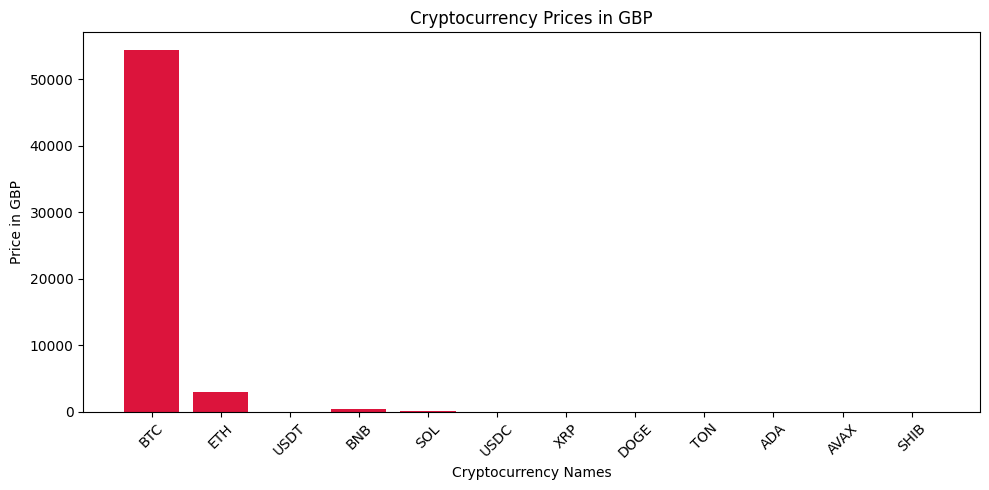

In [15]:
def main():
    crypto_data = get_crypto_data()
    symbols, prices = display_crypto_prices(crypto_data)
    if symbols and prices:
        plot_crypto_prices(symbols, prices)

if __name__ == "__main__":
    main()